## AskVideos-VideoCLIPv0.1 - A versatile text-grounded video embedding model

This colab demonstrates the AskVideos-VideoCLIP model. Like it's image-only counterpart, CLIP, VideoCLIP enables you to compute similarity scores but between text and videos.

VideoCLIP uses a Video Q-Former to aggregate frame-level embeddings temporally into a single embedding, maintaining relevance of the underlying content.

The resulting embedding is then trained with contrastive learning to match it's corresponding text, thus allowing for text-video similarity search.

In this colab, several features of this model are demonstrated:
1. Text-Video similarity - Given some text, find the videos that are most similar to it.
2. Video-Text similarity - Given a video, find the text that is most similar to it.
3. Video-Video similarity - Given a video, find the video that is most similar to it.

#### Links:
- [Github repo](https://github.com/AskYoutubeAI/AskVideos-VideoCLIP)
- [Huggingface](https://huggingface.co/AskYoutube/AskVideos-VideoCLIP-v0.1)
- Contact: askutubeai@gmail.com

In [1]:
from argparse import Namespace
import numpy as np
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import torch

import video_clip

!CUDA_VISIBLE_DEVICES=0

/home/codespace/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:
eval_config = 'eval_configs/video_clip_v0.1.yaml'
model, vis_processor = video_clip.load_model(eval_config)

Loading VIT
Loading VIT Done
Loading Q-Former
Load first Checkpoint: ./models/askvideos_clip_v0.1.pth


In [ ]:
# Initialize examples
videos = ["data/a_zebra_in_an_african_savannah_k1I4_jvO4fI.mp4", 'data/a_snake_fighting_a_mongoose_vdg9gkmWsEA.mp4', "data/an_african_ritual_1vvb16VyVEY.mp4", "data/a_tailor_making_a_suit_2Xum875-rMY.mp4", "data/a_review_of_a_phone_0X0Jm8QValY.mp4"]
texts = ['A snake fighting a mongoose', 'A tailor making a suit', 'An african ritual', 'A review of a phone', 'A zebra in an african savannah', 'A banana being sliced', 'A man exercising']

In [ ]:
# Function to display video
def display_video(video_path):
    video_html = f"""
    <video width="640" controls>
      <source src="{video_path}" type="video/mp4">
      Your browser does not support the video tag.
    </video>
    """
    display(HTML(video_html))

# Function to plot similarities as a horizontal bar chart
def plot_sims(probs, texts, title=None, bar_height=0.8, reverse_sort=False):
    # Sort the texts and probabilities together
    sorted_texts_probs = sorted(zip(texts, probs), key=lambda x: x[1], reverse=reverse_sort)
    sorted_texts, sorted_probs = zip(*sorted_texts_probs)
    
    fig_height = len(sorted_texts) * bar_height * 0.6
    plt.figure(figsize=(6, fig_height))
    if title:
        plt.title(title)
    bars = plt.barh(sorted_texts, sorted_probs, color='orange', height=bar_height)

    # Adding labels to each bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
                 va='center', ha='left')

    # plt.tight_layout()
    plt.show()

In [ ]:
# Compute video embeddings and similarities
video_embs = video_clip.get_all_video_embeddings(videos, model, vis_processor)
sims = video_clip.compute_sim(model, texts, video_embs)
sims = torch.cat(sims).detach().cpu().numpy()

[h264 @ 0x674e5dc0] mmco: unref short failure
[h264 @ 0x674e5dc0] mmco: unref short failure
[h264 @ 0x674e5dc0] mmco: unref short failure
[h264 @ 0x674e5dc0] mmco: unref short failure
[h264 @ 0x674e5dc0] mmco: unref short failure


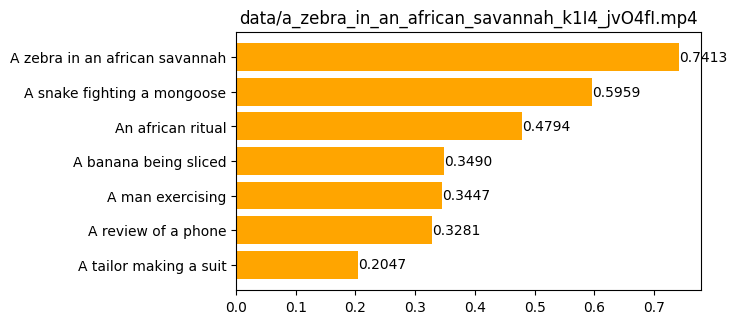

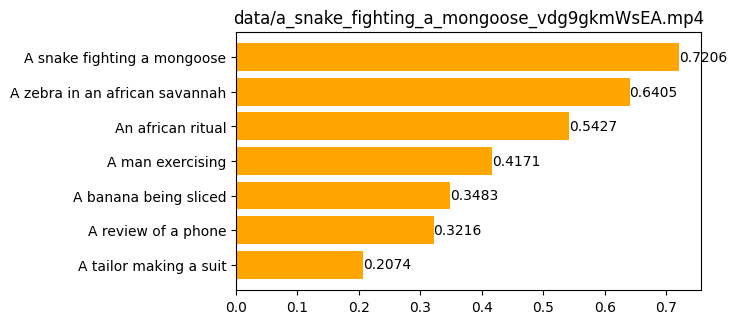

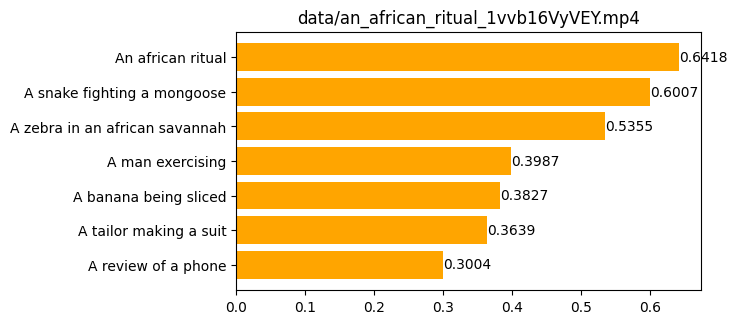

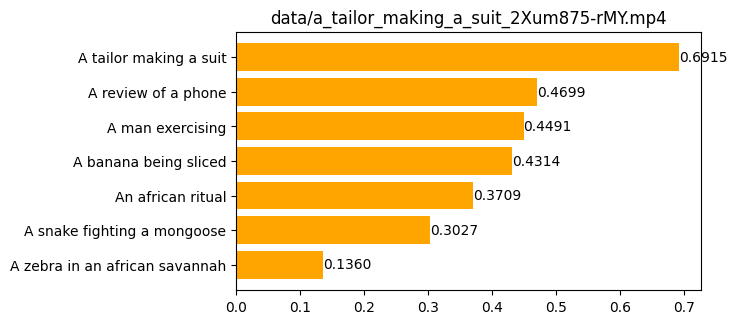

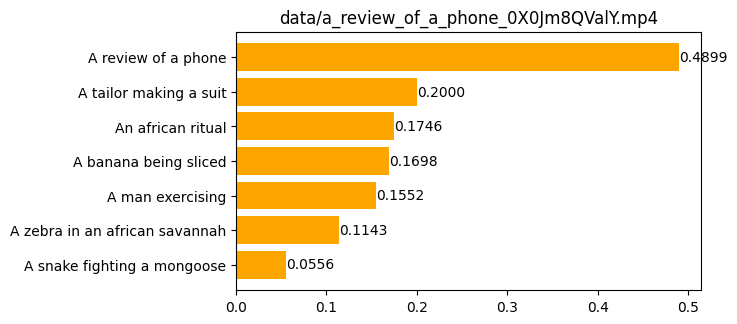

In [ ]:
# Video-Text matching
for i, video in enumerate(videos):
    display_video(video)
    plot_sims(sims[i], texts, title=video)


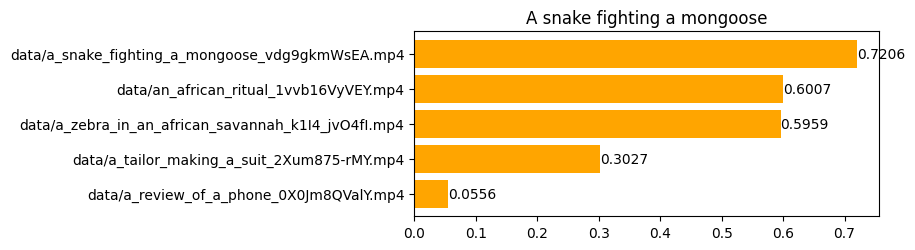

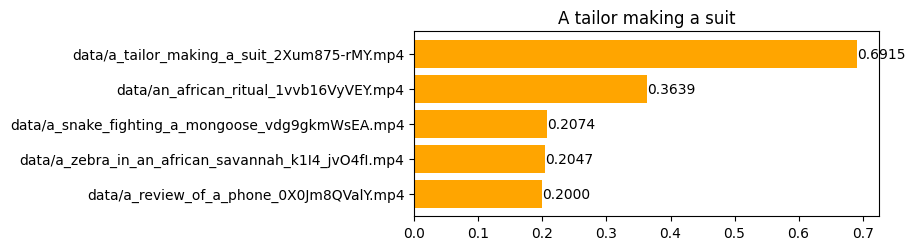

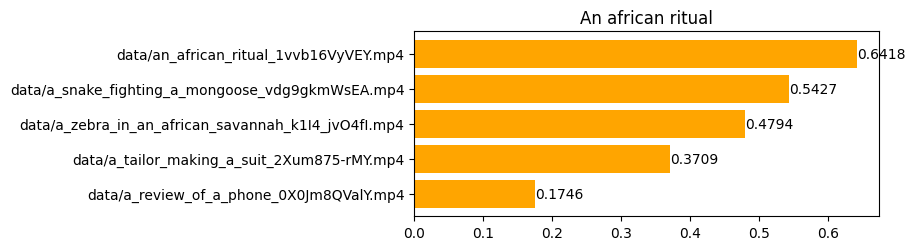

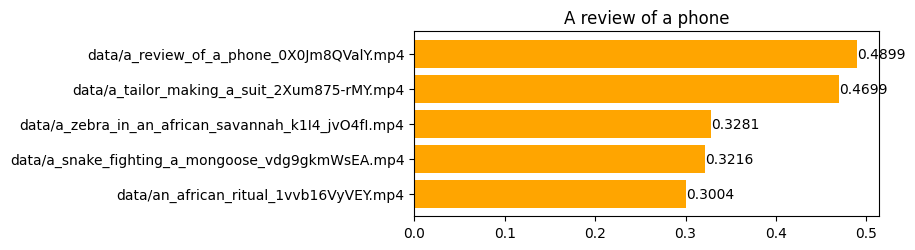

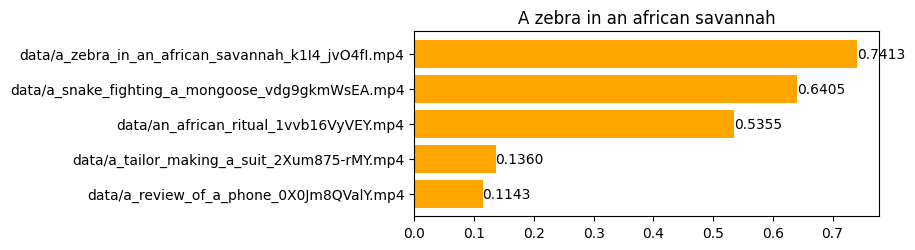

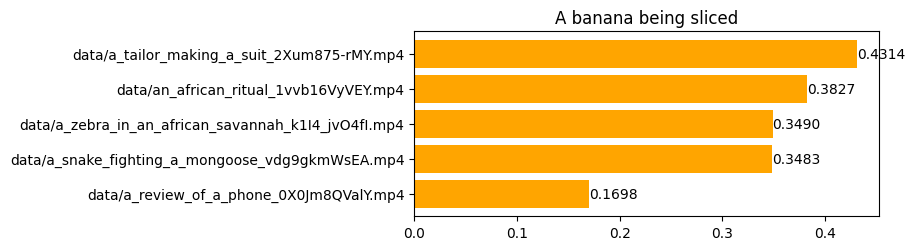

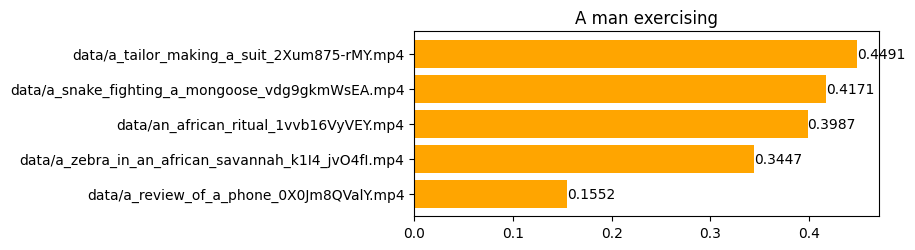

In [ ]:
# Text-Video matching
for i, text in enumerate(texts):
    plot_sims(sims.T[i], videos, title=text)


[h264 @ 0x674e5e40] mmco: unref short failure
[h264 @ 0x674e5e40] mmco: unref short failure
[h264 @ 0x674e5e40] mmco: unref short failure
[h264 @ 0x674e5e40] mmco: unref short failure
[h264 @ 0x674e5e40] mmco: unref short failure


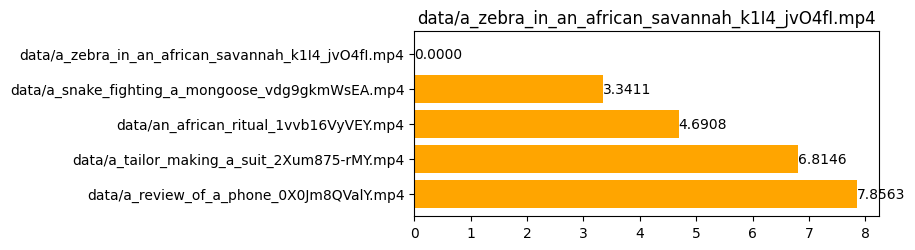

[h264 @ 0x677279c0] mmco: unref short failure
[h264 @ 0x677279c0] mmco: unref short failure
[h264 @ 0x677279c0] mmco: unref short failure
[h264 @ 0x677279c0] mmco: unref short failure
[h264 @ 0x677279c0] mmco: unref short failure


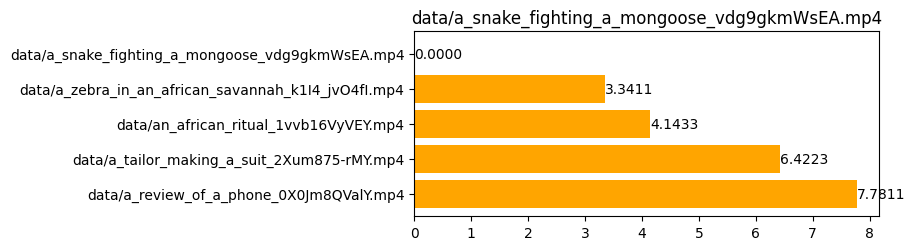

[h264 @ 0x6d3e2300] mmco: unref short failure
[h264 @ 0x6d3e2300] mmco: unref short failure
[h264 @ 0x6d3e2300] mmco: unref short failure
[h264 @ 0x6d3e2300] mmco: unref short failure
[h264 @ 0x6d3e2300] mmco: unref short failure
[h264 @ 0x5262aa00] mmco: unref short failure
[h264 @ 0x5262aa00] mmco: unref short failure
[h264 @ 0x5262aa00] mmco: unref short failure
[h264 @ 0x5262aa00] mmco: unref short failure
[h264 @ 0x5262aa00] mmco: unref short failure


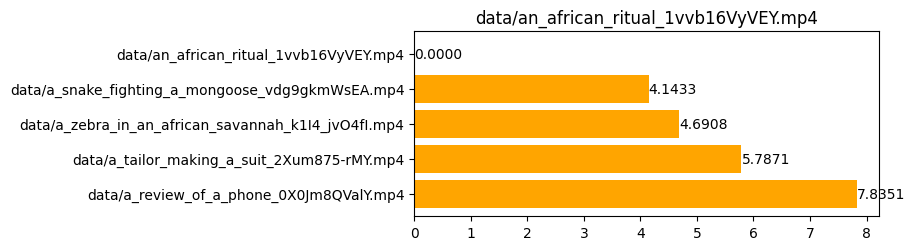

[h264 @ 0x52637b00] mmco: unref short failure
[h264 @ 0x52637b00] mmco: unref short failure
[h264 @ 0x52637b00] mmco: unref short failure
[h264 @ 0x52637b00] mmco: unref short failure
[h264 @ 0x52637b00] mmco: unref short failure


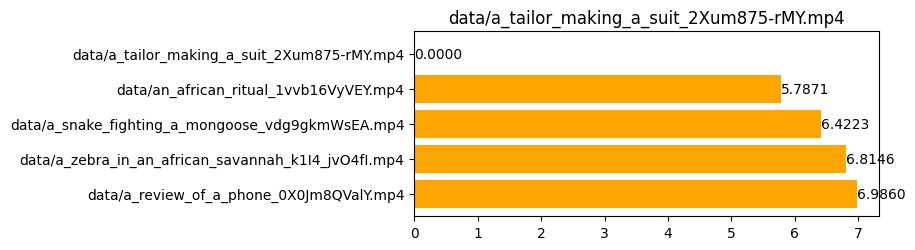

[h264 @ 0x6a6e7c40] mmco: unref short failure
[h264 @ 0x6a6e7c40] mmco: unref short failure
[h264 @ 0x6a6e7c40] mmco: unref short failure
[h264 @ 0x6a6e7c40] mmco: unref short failure
[h264 @ 0x6a6e7c40] mmco: unref short failure


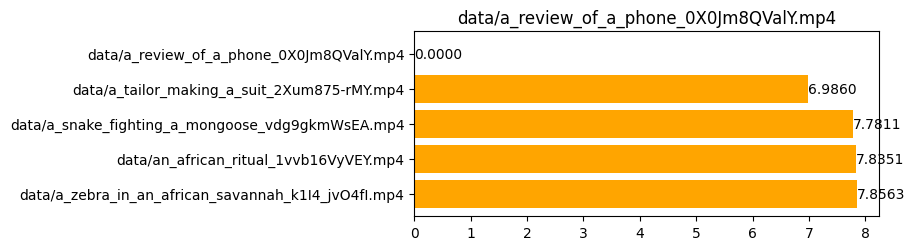

In [ ]:
# Video-Video matching
# NOTE: This is raw distance so a lower value means a closer match as opposed to the previous modes. 
for i, video in enumerate(videos):
    query_video_embs = video_clip.get_all_video_embeddings([video], model, vis_processor)
    video_embs = video_clip.get_all_video_embeddings(videos, model, vis_processor)

    dists = video_clip.compute_dist_videoq(model, query_video_embs[0], video_embs)
    dists = torch.stack(dists).detach().cpu().numpy()
    plot_sims(dists, videos, title=video, reverse_sort=True)

